# Part II - Factors affecting Borrower's Annual Percentage Rate (APR)

### by Ganiyat Issa-Onilu

## Investigation Overview


> The overall goal of this presentation is to explain the factors (i.e. prosper rating, income range and collateral) that affect borrower's annual loan payments. The following are key insights for this presentation:
> - Introduce the distribution of the borrower's APR (%) (dependent variable).
> - Explain the relationships between these factors and the dependent variable.


## Dataset Overview

> The dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. For the purpose of this project, 16 variables were selected for the explanatory analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans_df = pd.read_csv('prosperLoanData.csv')

#select columns in the data that are relevant to my analysis
loan_cols = ['ListingCreationDate','ListingCategory (numeric)','Term','LoanStatus', 'BorrowerRate','BorrowerAPR' ,'ProsperRating (Alpha)','ProsperScore', 'BorrowerState',
             'Occupation','EmploymentStatus','IsBorrowerHomeowner','DebtToIncomeRatio', 'IncomeRange', 'LoanOriginalAmount','MonthlyLoanPayment']
loan_data = loans_df[loan_cols]

#select only the observations with Prosper Ratings (i.e. remove rows with missing ProsperRating (Alpha))
loan_data = loan_data[loan_data['ProsperRating (Alpha)'].notnull()]

#order the prosper ratings and change to ordinal variable
ordered_rating = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordered_rating)
loan_data['ProsperRating (Alpha)'] = loan_data['ProsperRating (Alpha)'].astype(ordered_var)

#order the income ranges and change to ordinal variable
ordered_income = ['Not Employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordered_income)
loan_data['IncomeRange'] = loan_data['IncomeRange'].astype(ordered_var)

## Distribution of Borrower's APR

Borrower's APR take on a small range of values between 0.05 and 0.45. The distribution looks unimodal with the largest peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

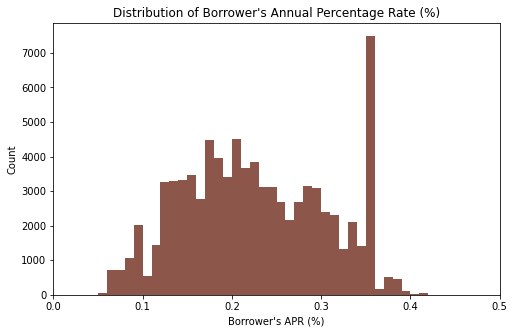

In [3]:
plt.figure(figsize=(8,5))
color = sb.color_palette()[5]
binsize = 0.01
bins = np.arange(0, loan_data['BorrowerAPR'].max()+0.05, binsize)
plt.hist(data = loan_data, x = 'BorrowerAPR', bins = bins, color=color)
plt.xlabel("Borrower's APR (%)")
plt.ylabel('Count')
plt.title("Distribution of Borrower's Annual Percentage Rate (%)")
plt.xlim(0,0.5);

## Prosper Rating vs Borrower's APR

> The borrower's APR decreases with the increasing prosper rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a negative association and strong effect on borrower APR.

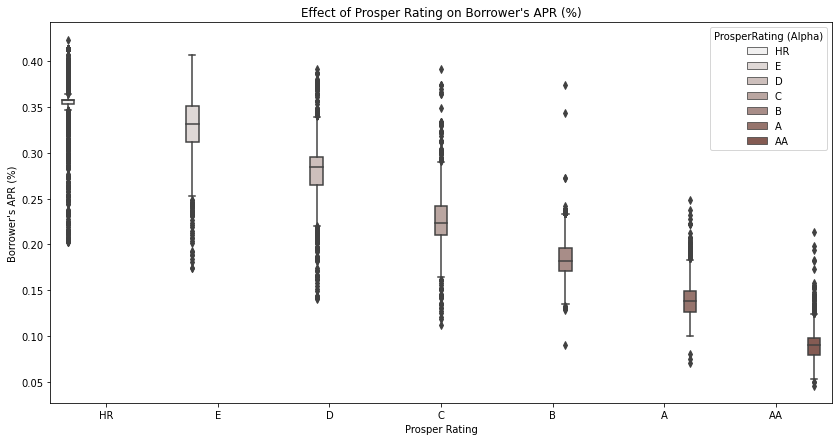

In [4]:
#plot boxplot
plt.figure(figsize = [14,7])
sb.boxplot(data = loan_data, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue='ProsperRating (Alpha)',color=color)
plt.ylabel("Borrower's APR (%)")
plt.xlabel('Prosper Rating')
plt.title("Effect of Prosper Rating on Borrower's APR (%)");

## Collateral vs Borrower's APR

> Borrowers that own homes to serve as collateral for loan requests tend to have lower annual percentage rate (APR) on average compared to those that do not own homes.

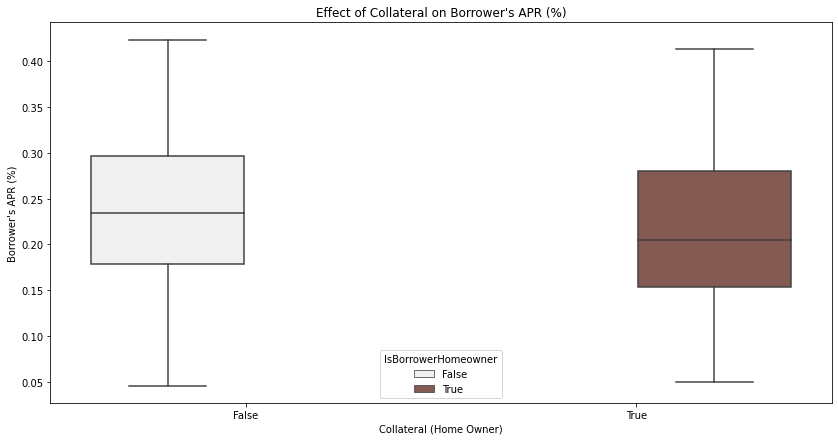

In [5]:
#plot boxplot
plt.figure(figsize = [14,7])
sb.boxplot(data = loan_data, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR', hue= 'IsBorrowerHomeowner', color=color)
plt.ylabel("Borrower's APR (%)")
plt.xlabel('Collateral (Home Owner)')
plt.title("Effect of Collateral on Borrower's APR (%)");

## Income Range vs Borrower's APR

> The borrower's APR decreases with higher income ranges. Borrowers with income range of 100000 dollars have the lowest APR while those with income range of $0 have the highest APR. In other words, Income Range has a strong effect on borrower APR.

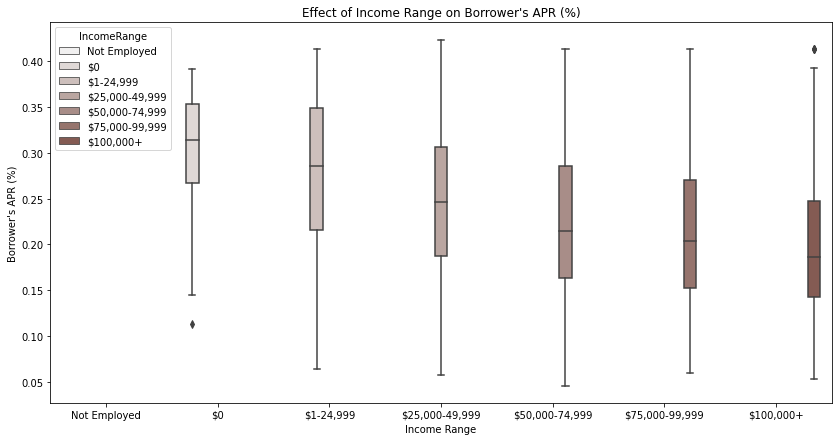

In [6]:
#plot boxplot
plt.figure(figsize = [14,7])
sb.boxplot(data = loan_data, x = 'IncomeRange', y = 'BorrowerAPR', hue= 'IncomeRange', color=color)
plt.ylabel("Borrower's APR (%)")
plt.xlabel('Income Range')
plt.title("Effect of Income Range on Borrower's APR (%)");

## Borrower's APR by Prosper Rating and Income Range

Interestingly, the borrower's APR decrease with the increase of income range for people with  ratings HR-AA as shown in the visual below:

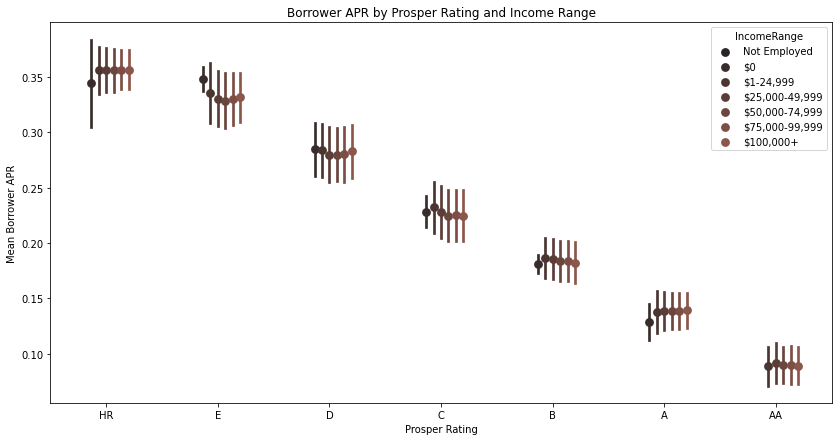

In [7]:
fig = plt.figure(figsize = [14,7])
ax = sb.pointplot(data = loan_data, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'IncomeRange',
           color=color, linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across prosper rating and income range')
plt.ylabel('Mean Borrower APR')
plt.xlabel('Prosper Rating')
plt.title('Borrower APR by Prosper Rating and Income Range');

In [8]:
!jupyter nbconvert Part_II_Prosper_Loan_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

^C
